In [1]:
import numpy as np

import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [4]:
file_path = "./OrangeQualityAnalysis/data/OrangeQualityData.csv"
oranges = pd.read_csv(file_path)
oranges

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y (Minor),4.5
...,...,...,...,...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5.0,13,1.0,Orange-Red,Tangerine,Y (Scars),5.0
237,7.4,275,8.5,3.5,5.0,20,5.0,Light Orange,Minneola (Hybrid),N,4.0
238,7.5,196,15.7,3.0,3.0,13,3.0,Deep Orange,Temple,Y (Minor Insect Damage),5.0
239,7.2,251,9.8,4.3,3.0,23,1.0,Light Orange,Moro (Blood),Y (Minor Insect Damage),3.0


In [5]:
print(oranges.columns)

Index(['Size (cm)', 'Weight (g)', 'Brix (Sweetness)', 'pH (Acidity)',
       'Softness (1-5)', 'HarvestTime (days)', 'Ripeness (1-5)', 'Color',
       'Variety', 'Blemishes (Y/N)', 'Quality (1-5)'],
      dtype='object')


In [6]:
orange_focus = oranges.drop(['Color'], axis=1)
orange_focus

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Blood Orange,N,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Hamlin,Y (Minor),4.5
...,...,...,...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5.0,13,1.0,Tangerine,Y (Scars),5.0
237,7.4,275,8.5,3.5,5.0,20,5.0,Minneola (Hybrid),N,4.0
238,7.5,196,15.7,3.0,3.0,13,3.0,Temple,Y (Minor Insect Damage),5.0
239,7.2,251,9.8,4.3,3.0,23,1.0,Moro (Blood),Y (Minor Insect Damage),3.0


In [7]:
orange_focus['Blemishes (Y/N)'] = orange_focus['Blemishes (Y/N)'].replace(to_replace=r'^Y.*', value='Y', regex=True)
orange_focus['Blemishes (Y/N)'] = orange_focus['Blemishes (Y/N)'].replace(to_replace=r'^N.*', value='N', regex=True)

orange_focus

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Blood Orange,N,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Hamlin,Y,4.5
...,...,...,...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5.0,13,1.0,Tangerine,Y,5.0
237,7.4,275,8.5,3.5,5.0,20,5.0,Minneola (Hybrid),N,4.0
238,7.5,196,15.7,3.0,3.0,13,3.0,Temple,Y,5.0
239,7.2,251,9.8,4.3,3.0,23,1.0,Moro (Blood),Y,3.0


In [8]:
orange_focus['Blemishes (Y/N)'].unique()


array(['N', 'Y'], dtype=object)

In [9]:
orange_focus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Size (cm)           241 non-null    float64
 1   Weight (g)          241 non-null    int64  
 2   Brix (Sweetness)    241 non-null    float64
 3   pH (Acidity)        241 non-null    float64
 4   Softness (1-5)      241 non-null    float64
 5   HarvestTime (days)  241 non-null    int64  
 6   Ripeness (1-5)      241 non-null    float64
 7   Variety             241 non-null    object 
 8   Blemishes (Y/N)     241 non-null    object 
 9   Quality (1-5)       241 non-null    float64
dtypes: float64(6), int64(2), object(2)
memory usage: 19.0+ KB


In [10]:
orange_focus['Blemishes (Y/N)'] = orange_focus['Blemishes (Y/N)'].map({'N':0, 'Y':1})
orange_focus

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Valencia,0,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Navel,0,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Cara Cara,0,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Blood Orange,0,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Hamlin,1,4.5
...,...,...,...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5.0,13,1.0,Tangerine,1,5.0
237,7.4,275,8.5,3.5,5.0,20,5.0,Minneola (Hybrid),0,4.0
238,7.5,196,15.7,3.0,3.0,13,3.0,Temple,1,5.0
239,7.2,251,9.8,4.3,3.0,23,1.0,Moro (Blood),1,3.0


In [11]:
y = orange_focus['Variety']
X = orange_focus.drop(["Variety"], axis=1)
X

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,0,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,0,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,0,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,0,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,1,4.5
...,...,...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5.0,13,1.0,1,5.0
237,7.4,275,8.5,3.5,5.0,20,5.0,0,4.0
238,7.5,196,15.7,3.0,3.0,13,3.0,1,5.0
239,7.2,251,9.8,4.3,3.0,23,1.0,1,3.0


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
rfc = RandomForestClassifier(random_state=42, oob_score=True)
rfc.fit(X_train, y_train)

RandomForestClassifier(oob_score=True, random_state=42)

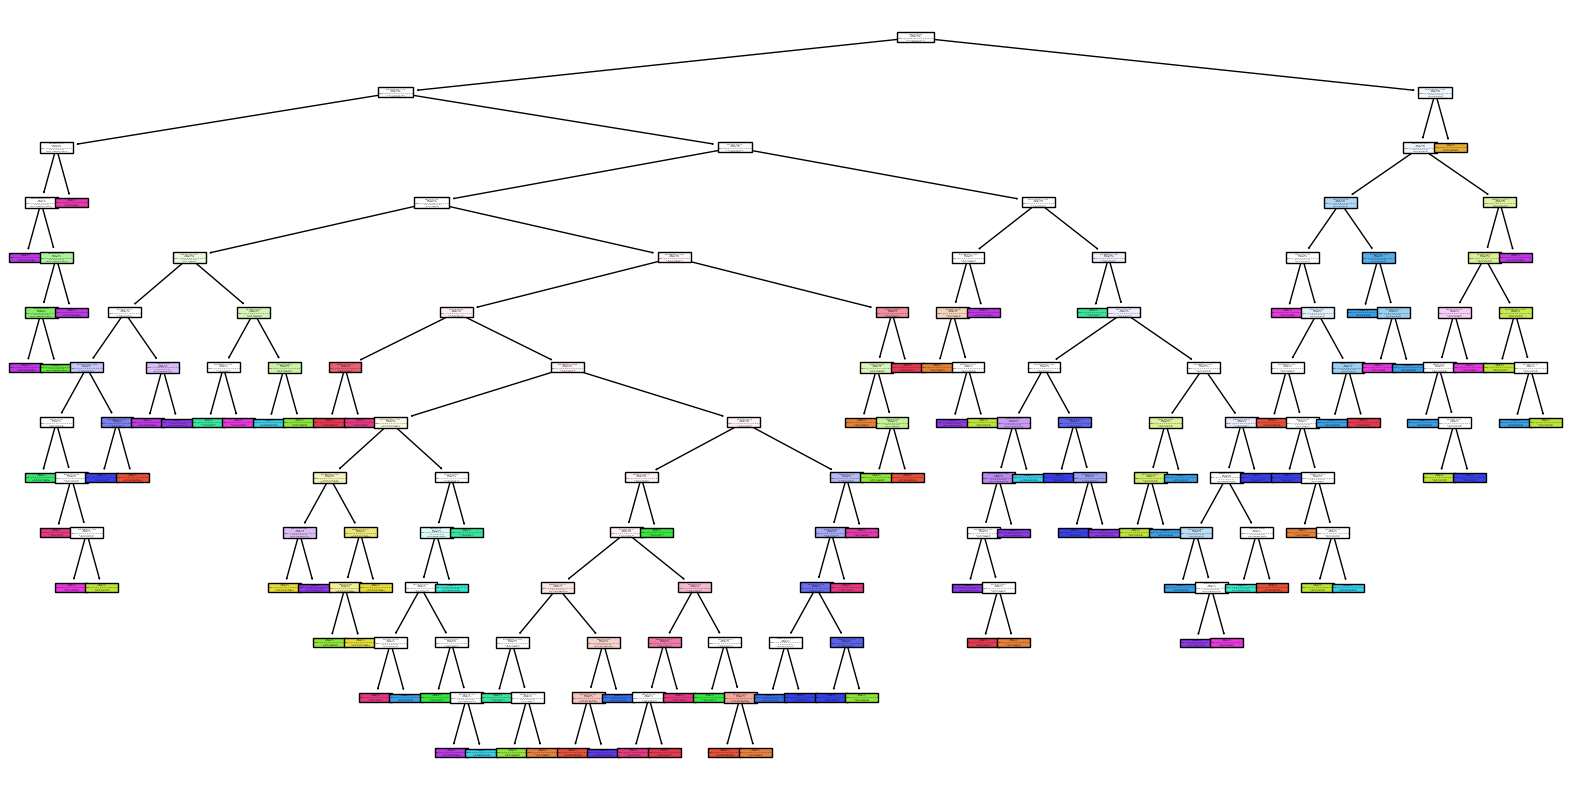

In [14]:
from sklearn.tree import plot_tree

# Convert Index object to list
feature_names_list = list(X.columns)
class_names_list = list(rfc.classes_)

# Visualize one of the trees
plt.figure(figsize=(20, 10))
plot_tree(rfc.estimators_[0], feature_names=feature_names_list, class_names=class_names_list, filled=True)
plt.show()


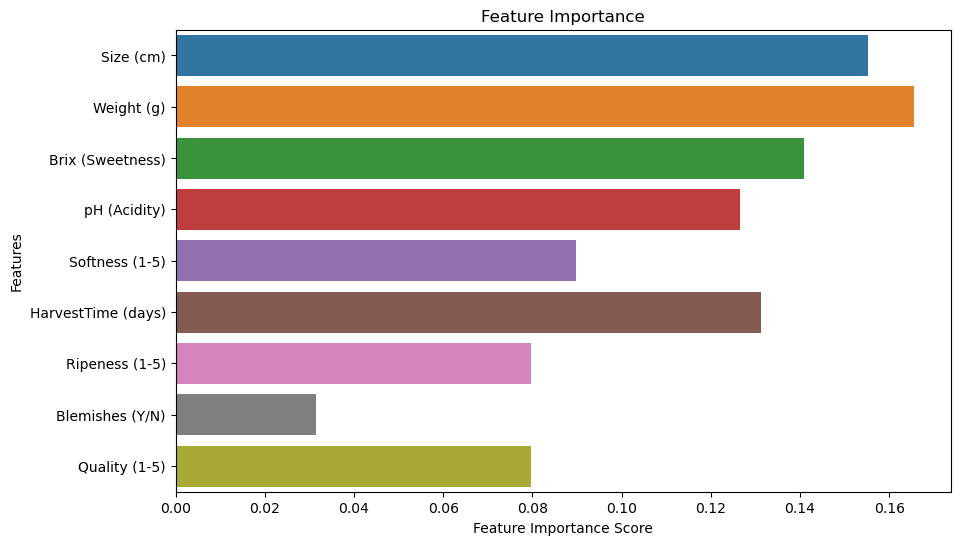

In [15]:
feature_importances = pd.Series(rfc.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Feature Importance")
plt.show()


Size (cm)           241 non-null    float64
 1   Weight (g)          241 non-null    int64  
 2   Brix (Sweetness)    241 non-null    float64
 3   pH (Acidity)        241 non-null    float64
 4   Softness (1-5)      241 non-null    float64
 5   HarvestTime (days)  241 non-null    int64  
 6   Ripeness (1-5)      241 non-null    float64
 7   Variety             241 non-null    object 
 8   Blemishes (Y/N)     241 non-null    object 
 9   Quality (1-5)       241

In [ ]:
y_pred = rfc.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
                       precision    recall  f1-score   support

             Ambiance       0.00      0.00      0.00         3
  California Valencia       0.00      0.00      0.00         0
            Cara Cara       0.25      0.50      0.33         2
           Clementine       0.00      0.00      0.00         2
Clementine (Seedless)       0.00      0.00      0.00         1
               Hamlin       0.50      1.00      0.67         1
      Honey Tangerine       0.00      0.00      0.00         1
                Jaffa       1.00      0.20      0.33         5
    Midsweet (Hybrid)       0.00      0.00      0.00         0
    Minneola (Hybrid)       1.00      0.33      0.50         3
         Moro (Blood)       0.25      0.33      0.29         3
                Navel       0.00      0.00      0.00         3
 Navel (Early Season)       0.00      0.00      0.00         1
  Navel (Late Season)       0.00      0.00      0.00         3
   Ortanique (Hybrid)       0.0

/Users/yuhanburgess/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yuhanburgess/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yuhanburgess/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yuhanbur

In [16]:
orange_feat_reduced = orange_focus.drop(['Quality (1-5)', 'Blemishes (Y/N)', 'Ripeness (1-5)', 'Softness (1-5)'], axis=1)
orange_feat_reduced

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),HarvestTime (days),Variety
0,7.5,180,12.0,3.2,10,Valencia
1,8.2,220,10.5,3.4,14,Navel
2,6.8,150,14.0,3.0,7,Cara Cara
3,9.0,250,8.5,3.8,21,Blood Orange
4,8.5,210,11.5,3.3,12,Hamlin
...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,13,Tangerine
237,7.4,275,8.5,3.5,20,Minneola (Hybrid)
238,7.5,196,15.7,3.0,13,Temple
239,7.2,251,9.8,4.3,23,Moro (Blood)


In [20]:
y = orange_feat_reduced['Variety']
X = orange_feat_reduced.drop(["Variety"], axis=1)
X

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),HarvestTime (days)
0,7.5,180,12.0,3.2,10
1,8.2,220,10.5,3.4,14
2,6.8,150,14.0,3.0,7
3,9.0,250,8.5,3.8,21
4,8.5,210,11.5,3.3,12
...,...,...,...,...,...
236,8.0,194,10.9,3.6,13
237,7.4,275,8.5,3.5,20
238,7.5,196,15.7,3.0,13
239,7.2,251,9.8,4.3,23


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
rfc = RandomForestClassifier(random_state=42, oob_score=True)
rfc.fit(X_train, y_train)

RandomForestClassifier(oob_score=True, random_state=42)

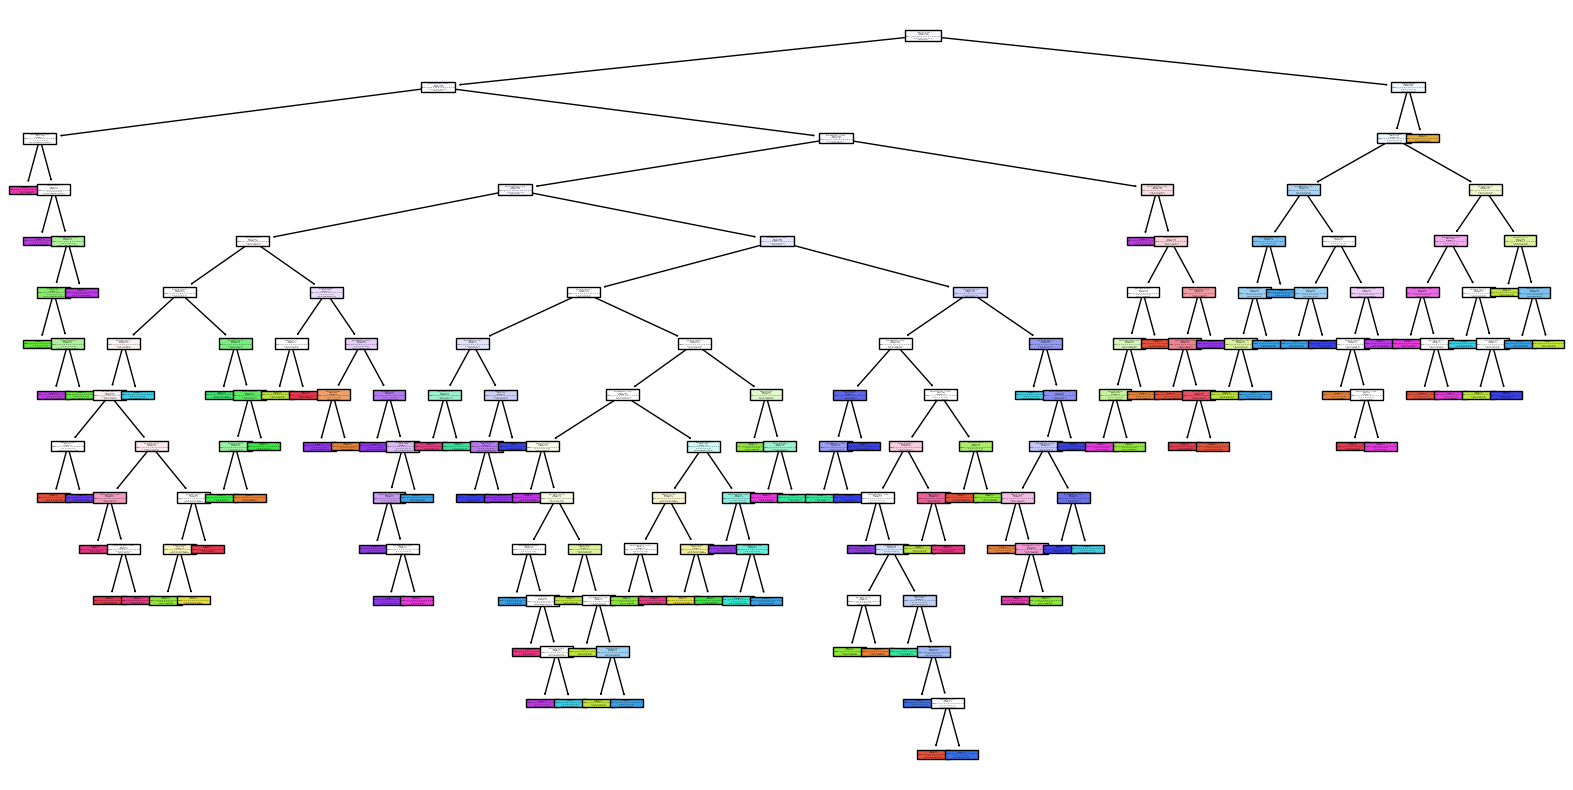

In [23]:
# Convert Index object to list
feature_names_list = list(X.columns)
class_names_list = list(rfc.classes_)

# Visualize one of the trees
plt.figure(figsize=(20, 10))
plot_tree(rfc.estimators_[0], feature_names=feature_names_list, class_names=class_names_list, filled=True)
plt.show()

In [24]:
y_pred = rfc.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
                       precision    recall  f1-score   support

             Ambiance       0.00      0.00      0.00         3
  California Valencia       0.00      0.00      0.00         0
            Cara Cara       0.25      1.00      0.40         2
           Clementine       0.00      0.00      0.00         2
Clementine (Seedless)       0.00      0.00      0.00         1
               Hamlin       0.00      0.00      0.00         1
      Honey Tangerine       0.00      0.00      0.00         1
                Jaffa       1.00      0.20      0.33         5
    Midsweet (Hybrid)       0.00      0.00      0.00         0
    Minneola (Hybrid)       0.33      0.33      0.33         3
         Moro (Blood)       0.33      0.33      0.33         3
                Navel       0.00      0.00      0.00         3
 Navel (Early Season)       0.00      0.00      0.00         1
  Navel (Late Season)       0.00      0.00      0.00         3
   Ortanique (Hybrid)       0.0

/Users/yuhanburgess/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yuhanburgess/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yuhanburgess/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yuhanbur

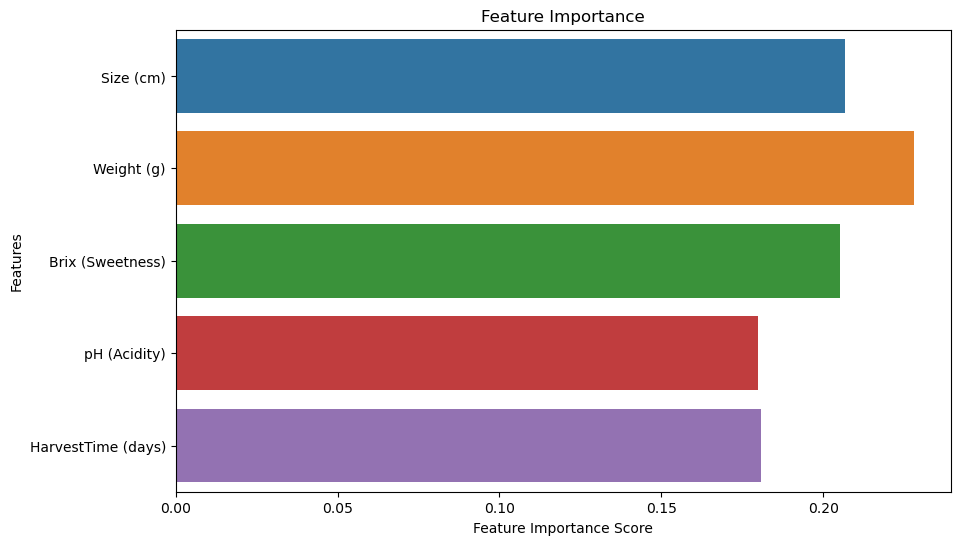

In [25]:
feature_importances = pd.Series(rfc.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Feature Importance")
plt.show()


Variety ~ `Size (cm)` + `Brix (Sweetness)` + `pH (Acidity)` + `Quality (1-5)

Size (cm)           241 non-null    float64
 1   Weight (g)          241 non-null    int64  
 2   Brix (Sweetness)    241 non-null    float64
 3   pH (Acidity)        241 non-null    float64
 4   Softness (1-5)      241 non-null    float64
 5   HarvestTime (days)  241 non-null    int64  
 6   Ripeness (1-5)      241 non-null    float64
 7   Variety             241 non-null    object 
 8   Blemishes (Y/N)     241 non-null    object 
 9   Quality (1-5)       241

In [26]:
orange_reduced_step = orange_focus.drop(['Weight (g)', 'Softness (1-5)', 'HarvestTime (days)', 'Ripeness (1-5)', "Blemishes (Y/N)"], axis=1)
orange_reduced_step

,Size (cm),Brix (Sweetness),pH (Acidity),Variety,Quality (1-5)
0,7.5,12.0,3.2,Valencia,4.0
1,8.2,10.5,3.4,Navel,4.5
2,6.8,14.0,3.0,Cara Cara,5.0
3,9.0,8.5,3.8,Blood Orange,3.5
4,8.5,11.5,3.3,Hamlin,4.5
...,...,...,...,...,...
236,8.0,10.9,3.6,Tangerine,5.0
237,7.4,8.5,3.5,Minneola (Hybrid),4.0
238,7.5,15.7,3.0,Temple,5.0
239,7.2,9.8,4.3,Moro (Blood),3.0


In [27]:
y = orange_reduced_step['Variety']
X = orange_reduced_step.drop(["Variety"], axis=1)
X

,Size (cm),Brix (Sweetness),pH (Acidity),Quality (1-5)
0,7.5,12.0,3.2,4.0
1,8.2,10.5,3.4,4.5
2,6.8,14.0,3.0,5.0
3,9.0,8.5,3.8,3.5
4,8.5,11.5,3.3,4.5
...,...,...,...,...
236,8.0,10.9,3.6,5.0
237,7.4,8.5,3.5,4.0
238,7.5,15.7,3.0,5.0
239,7.2,9.8,4.3,3.0


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
rfc = RandomForestClassifier(random_state=42, oob_score=True)
rfc.fit(X_train, y_train)

RandomForestClassifier(oob_score=True, random_state=42)

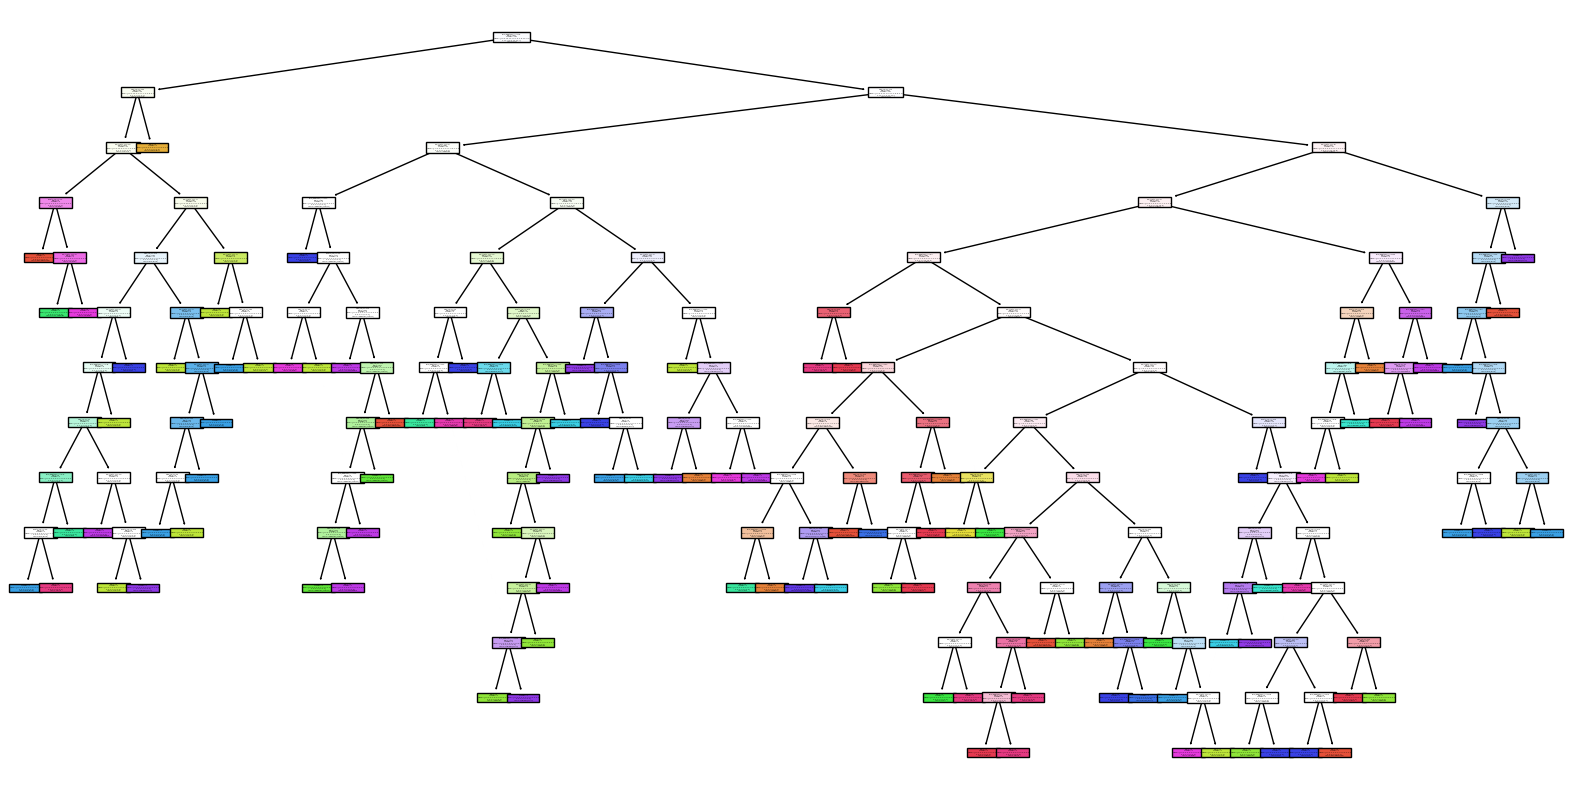

In [30]:
# Convert Index object to list
feature_names_list = list(X.columns)
class_names_list = list(rfc.classes_)

# Visualize one of the trees
plt.figure(figsize=(20, 10))
plot_tree(rfc.estimators_[0], feature_names=feature_names_list, class_names=class_names_list, filled=True)
plt.show()

In [32]:
y_pred = rfc.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
                       precision    recall  f1-score   support

             Ambiance       0.00      0.00      0.00         3
  California Valencia       0.00      0.00      0.00         0
            Cara Cara       0.33      0.50      0.40         2
           Clementine       0.00      0.00      0.00         2
Clementine (Seedless)       0.00      0.00      0.00         1
               Hamlin       0.00      0.00      0.00         1
      Honey Tangerine       0.00      0.00      0.00         1
                Jaffa       0.33      0.20      0.25         5
    Midsweet (Hybrid)       0.00      0.00      0.00         0
    Minneola (Hybrid)       0.50      0.33      0.40         3
         Moro (Blood)       0.20      0.33      0.25         3
     Murcott (Hybrid)       0.00      0.00      0.00         0
                Navel       0.00      0.00      0.00         3
 Navel (Early Season)       0.00      0.00      0.00         1
  Navel (Late Season)       0.0

/Users/yuhanburgess/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yuhanburgess/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yuhanburgess/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yuhanbur

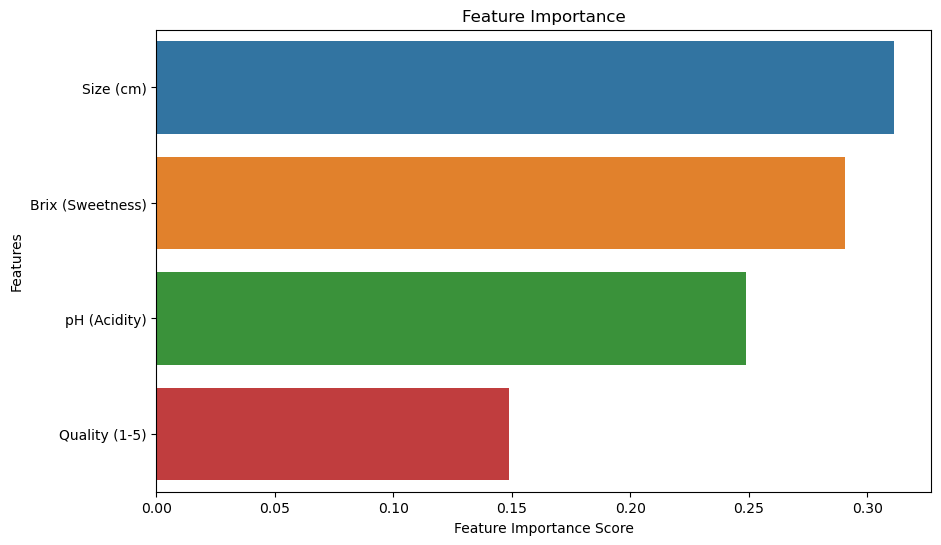

In [31]:
feature_importances = pd.Series(rfc.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Feature Importance")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline for preprocessing and modeling
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('rfc', RandomForestClassifier(random_state=42))  # Random Forest classifier
])

# Define hyperparameters for GridSearchCV
param_grid = {
    'rfc__n_estimators': [50, 100, 200],
    'rfc__max_depth': [None, 5, 10],
    'rfc__min_samples_split': [2, 5, 10]
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the model on the testing set
y_pred = grid_search.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

/Users/yuhanburgess/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Hyperparameters: {'rfc__max_depth': None, 'rfc__min_samples_split': 2, 'rfc__n_estimators': 100}
Classification Report:
                       precision    recall  f1-score   support

             Ambiance       0.00      0.00      0.00         3
  California Valencia       0.00      0.00      0.00         0
            Cara Cara       0.25      0.50      0.33         2
           Clementine       0.00      0.00      0.00         2
Clementine (Seedless)       0.00      0.00      0.00         1
               Hamlin       0.50      1.00      0.67         1
      Honey Tangerine       0.00      0.00      0.00         1
                Jaffa       1.00      0.20      0.33         5
    Midsweet (Hybrid)       0.00      0.00      0.00         0
    Minneola (Hybrid)       1.00      0.33      0.50         3
         Moro (Blood)       0.25      0.33      0.29         3
                Navel       0.00      0.00      0.00         3
 Navel (Early Season)       0.00      0.00      0.00   

/Users/yuhanburgess/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yuhanburgess/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yuhanburgess/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yuhanbur

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Prepare features and target variable
X = orange_focus.drop(columns=['Brix (Sweetness)', 'Variety'])  # Features
y = orange_focus['Brix (Sweetness)']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Gradient Boosting Regression model
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

# Predict on the testing set
y_pred = gbr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


Mean Squared Error: 3.4767990805867406
Mean Absolute Error: 1.316640767173834
R-squared: 0.5181219806846458


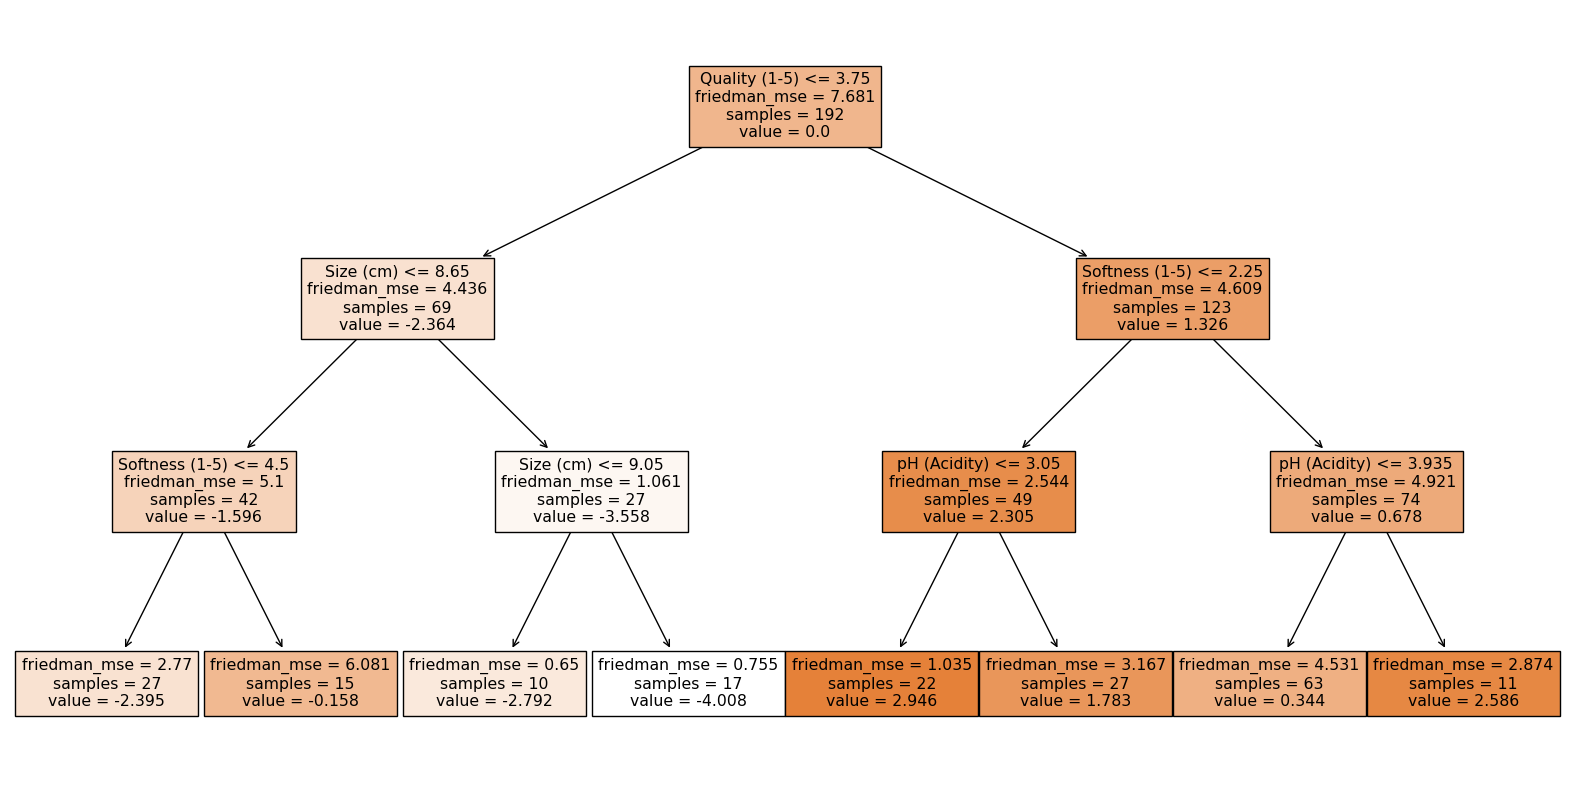

In [ ]:
feature_names_list = list(X.columns)
# class_names_list = list(rfc.classes_)

plt.figure(figsize=(20, 10))
plot_tree(gbr.estimators_[0, 0], feature_names=feature_names_list, class_names=list(rfc.classes_), filled=True)
plt.show()